Input image: ![input](Images/example4.png)

# Detect Contours (Object Filter)

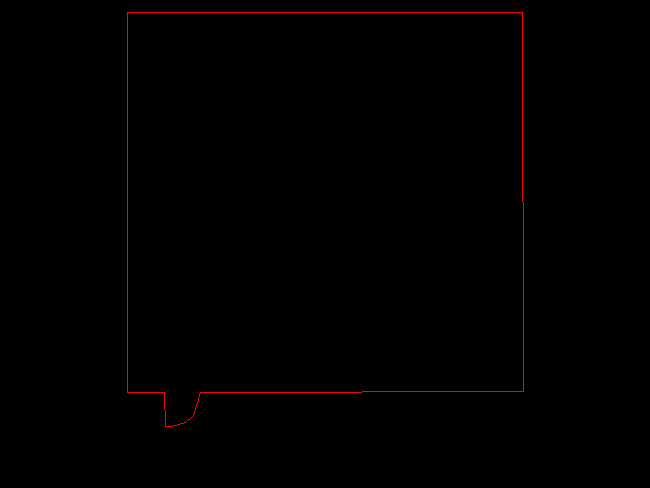

In [1]:
# Import library
from utils.FloorplanToBlenderLib import *

import cv2 # for image gathering
import numpy as np

# for visualize
from PIL import Image
from IPython.display import display

img_path = "Images/example4.png"

# Read floorplan image
img = cv2.imread(img_path)

# Create blank image
height, width, channels = img.shape
blank_image = np.zeros((height,width,3), np.uint8)

# Grayscale image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# detect outer Contours (simple floor or roof solution), paint them red on blank_image
contour, img = detect.detectOuterContours(gray, blank_image, color=(255,0,0))

# Display
display(Image.fromarray(img))

In [2]:
import easyocr

C:\Python\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
reader = easyocr.Reader(['ch_tra','en']) # this needs to run only once to load the model into memory

# Detect Rooms (Object Filter)

In [4]:
img = cv2.imread('testimage/01769H-3.jpg')

    # grayscale image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# create verts (points 3d), points to use in mesh creations
verts = []
# create faces for each plane, describe order to create mesh points
faces = []

# Height of waLL
height = 0.999

# Scale pixel value to 3d pos
scale = 100

gray = detect.wall_filter(gray)

gray = ~gray

rooms, colored_rooms = detect.find_rooms(gray.copy())

gray_rooms =  cv2.cvtColor(colored_rooms,cv2.COLOR_BGR2GRAY)

# contours, hierarchy = cv2.findContours(gray_rooms,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# area=sorted(contours, key=cv2.contourArea, reverse=True)

In [5]:
# get words position
result = reader.readtext('testimage/01769H-3.jpg',
                         paragraph=True, 
                         x_ths=0.5,
                         mag_ratio=1.4)
img_array=[]
room_name=[]
for i,j in enumerate(result):
    img_array.append(result[i][0])
for i,j in enumerate(result):
    room_name.append(result[i][1])

print(img_array)
print(room_name) 

[[[252, 5], [286, 5], [286, 37], [252, 37]], [[333, 50], [476, 50], [476, 82], [333, 82]], [[573, 68], [717, 68], [717, 100], [573, 100]], [[385, 135], [424, 135], [424, 159], [385, 159]], [[674, 154], [712, 154], [712, 175], [674, 175]], [[252, 182], [303, 182], [303, 239], [252, 239]], [[541, 200], [581, 200], [581, 221], [541, 221]], [[510, 269], [539, 269], [539, 296], [510, 296]], [[577, 277], [615, 277], [615, 298], [577, 298]], [[685, 273], [736, 273], [736, 303], [685, 303]], [[371, 287], [435, 287], [435, 325], [371, 325]], [[477, 394], [543, 394], [543, 431], [477, 431]], [[565, 405], [616, 405], [616, 434], [565, 434]], [[669, 408], [740, 408], [740, 437], [669, 437]], [[506, 499], [557, 499], [557, 529], [506, 529]], [[592, 503], [633, 503], [633, 529], [592, 529]], [[670, 498], [743, 498], [743, 554], [670, 554]], [[263, 683], [744, 683], [744, 768], [263, 768]]]
['北', '露台加蓋雨遮', '露台加蓋雨遮', '露台', '露台', '陽台 外移', '浴廁', '室', '沿廁', '臥室', '客廳', '餐廳', '書房', '衣帽間', '廚房', '陽台', '增建 

In [6]:
# find words center
import numpy as np
xylist=[]
for i,v in enumerate(img_array):
    arr_x=((np.array(v[1])+np.array(v[0]))/2)[0]
    arr_y=((np.array(v[2])+np.array(v[1]))/2)[1]
    xylist.append([arr_x,arr_y])
print(xylist)

[[269.0, 21.0], [404.5, 66.0], [645.0, 84.0], [404.5, 147.0], [693.0, 164.5], [277.5, 210.5], [561.0, 210.5], [524.5, 282.5], [596.0, 287.5], [710.5, 288.0], [403.0, 306.0], [510.0, 412.5], [590.5, 419.5], [704.5, 422.5], [531.5, 514.0], [612.5, 516.0], [706.5, 526.0], [503.5, 725.5]]


In [7]:
# get box positions for rooms
boxes, gray_rooms= detect.detectPreciseBoxes(gray_rooms, gray_rooms)
# display(Image.fromarray(gray_rooms))
# print(len(boxes))
box_pos=np.array(boxes)
# if words in box, print 'yes'
for index,value in enumerate(box_pos):
    for i,j in xylist:
        print(value.min(axis=1).max())
        print(value.min(axis=1).min())
        print(i)
        if i > value.min(axis=1).min() and i < value.min(axis=1).max():
            print('yes')
        else:
            print('no')
    # print(value)

578
487
269.0
no
578
487
404.5
no
578
487
645.0
no
578
487
404.5
no
578
487
693.0
no
578
487
277.5
no
578
487
561.0
yes
578
487
524.5
yes
578
487
596.0
no
578
487
710.5
no
578
487
403.0
no
578
487
510.0
yes
578
487
590.5
no
578
487
704.5
no
578
487
531.5
yes
578
487
612.5
no
578
487
706.5
no
578
487
503.5
yes
634
341
269.0
no
634
341
404.5
yes
634
341
645.0
no
634
341
404.5
yes
634
341
693.0
no
634
341
277.5
no
634
341
561.0
yes
634
341
524.5
yes
634
341
596.0
yes
634
341
710.5
no
634
341
403.0
yes
634
341
510.0
yes
634
341
590.5
yes
634
341
704.5
no
634
341
531.5
yes
634
341
612.5
yes
634
341
706.5
no
634
341
503.5
yes
752
397
269.0
no
752
397
404.5
yes
752
397
645.0
yes
752
397
404.5
yes
752
397
693.0
yes
752
397
277.5
no
752
397
561.0
yes
752
397
524.5
yes
752
397
596.0
yes
752
397
710.5
yes
752
397
403.0
yes
752
397
510.0
yes
752
397
590.5
yes
752
397
704.5
yes
752
397
531.5
yes
752
397
612.5
yes
752
397
706.5
yes
752
397
503.5
yes
616
397
269.0
no
616
397
404.5
yes
616
397
645.0
n

C:\Users\mingy\AppData\Local\Temp\ipykernel_1804\1949195127.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  box_pos=np.array(boxes)
